In [1]:
# Run me to import libraries used in the sheet
import math

import matplotlib.pyplot as plt

from random import uniform

from fractions import Fraction

from lib.turtle import Turtle
from lib.image_utils import draw_path

## Scaling

A shape can be scaled such that it looks the same as before by increasing the length of all the lines in the image by the same amount.

![house](./images/scale_house.png)

This implies that the ratios between any two lengths in the original shape is the same as the ratio in the scaled shape:

![ratios](./images/length_ratios.png)

Applying this to a circle implies that scaling it increases the length across it (*the diameter*) and the the length around it (*the circumference*) by the same amount and the ratio between these two lengths is always the same for any circle. This ratio is the number called *pi*

![pi](./images/pi.png)

## So what is pi?

Let's consider a circle with a diameter of 1 unit. We won't be too concerned over which units we pick as pi is a ratio or two lengths and hence doesn't have units - it's just a number. A three meter plank is three times bigger than a 1 meter plank just as a three mile stretch of road is three times longer that a one mile one -  the ratio of their lengths in both instances is three. If we consider a 1 unit square drawn around this circle we can see that the circumference of the square is greater than the circle. Taking a path along the circle allows us to cut the corners.

![square circle](./images/square_circle.png)

Hence the number pi is less than 4. If we cut more corners by considering regular shapes with more sides we should get closer and closer to the diameter of a circle:

![square circle](./images/other_shapes_circle.png)

Consider what we would need to do to walk out a regular shape. 

To walk out a square we need to take one step along, turn a quarter of a full revolution; take another step; quarter turn; another step; quarter turn and then the final step takes us back to where we first started. Likewise to walk out a pentagon (a five sided shape) we would take a step, turn *a fifth* of a revolution repeating five times until we're back to where we started. For a hexagon we would step and turn *a sixth* of a full revolution and repeat six times and so on. We can measure the diameter of our stepped out shape by measuring the distance between the top and bottom. The circumference is just the size of the step multiplied by the number of sides. Let's look at a programme that will let us step out these shapes and measure the ratios. 


## The turtle

The turtle is a very simple object we can command to draw out paths. This one is a simplified form of the [one in the standard library](https://docs.python.org/3.3/library/turtle.html?highlight=turtle) and has has just three commands:

* `go(length)` - go forard length `length`
* `turn_left(fraction)` - turn left `fraction` of a full revolution
* `turn_right(fraction)` - turn right `fraction` of a full revolution

It records its path as it goes and this path can be drawn by using the helper function `draw_path` eg: to draw out a square

```python
turtle = Turtle()
turtle.go(1)
turtle.turn_left(Fraction(1,4))
turtle.go(1)
turtle.turn_left(Fraction(1,4))
turtle.go(1)
turtle.turn_left(Fraction(1,4))
turtle.go(1)
draw_path(turtle.path)
```

Let's run it:

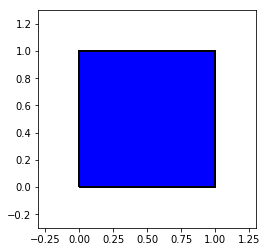

In [2]:
turtle = Turtle()
turtle.go(1)
turtle.turn_left(Fraction(1,4))
turtle.go(1)
turtle.turn_left(Fraction(1,4))
turtle.go(1)
turtle.turn_left(Fraction(1,4))
turtle.go(1)
draw_path(turtle.path)

It started from the coordinates (0,0) went one step east (it initially points in the direction of the x-axis). It then turned a quarter of a turn left so it was pointing due north. The next step takes it to coordiate (1, 1). After two more turns and steps it landed back at (0,0).

Feel free to play around and move the turtle around and plot the path to see what shapes you can make. Here's a random pattern formed by going forward a random number of steps and then making a random turn.

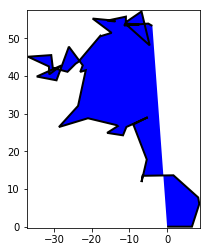

In [3]:
turtle = Turtle()
for i in range(50):
    turtle.go(uniform(0,10))
    turtle.turn_left(uniform(-1,1))

draw_path(turtle.path)

Just as we plotted out the square above we can generalise this to any regular shape. For instance for a twenty sided shape we would just turn a twentieth of a full revolution after each step and repeat twenty times. The following function `draw_regular_polygon` does just that. It loops over the number of sides and uses that number to determine the fraction of the turn:

In [4]:
def draw_regular_polygon(num_sides, side_length=1):
    turtle = Turtle()
    for i in range(num_sides):
        turtle.go(side_length)
        turtle.turn_left(Fraction(1, num_sides))
    return turtle.path

Let's draw out some shapes

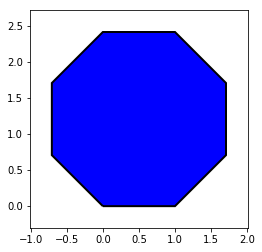

In [5]:
# An octogon with eight sides:
draw_path(draw_regular_polygon(8))

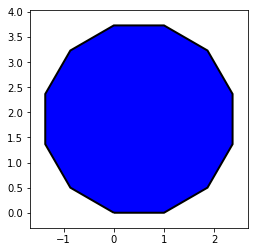

In [6]:
# An dodecagon with twelve sides:
draw_path(draw_regular_polygon(12))

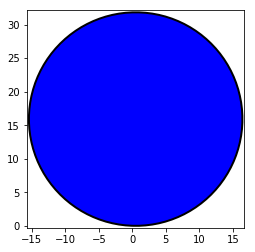

In [7]:
# A one hundred sided shape
draw_path(draw_regular_polygon(100))

Play around. You may notice that some of these shapes with 100, 1000 or 10000 sides are starting to look very much like circles. And here's the thing - what is a circle? If we make the sides shorter and shorter whilst adding more and more of them things get more and more 'circley'. We could think that the ideal mathmatical circle is the shape at the end of this line that has infinite infinitly small sides! That two infinities should cancel out to produce something so straight forward is incredible. We should be seeing a bit move of this sort of thing over the coming sheets that perhaps those infinities won't look so scary after all.

In `draw_regular_polygon` the sides are all of length 1 so the total circumference is equal to the number of sides in the shape. We can get the height (and hence the diameter) by looking at the maximum value on the y axis given we started at (0,0). `draw_regular_polygon` returns the complete path so we can use the built in `max` function to return it. The below function measures the ratio of the circumference to the diameter for the regular polygon with `num_sides`

In [8]:
def polygon_circumference_diameter_ratio(num_sides):
    path = draw_regular_polygon(num_sides)
    diameter = max(y for (_, y) in path)
    circumference = num_sides
    return circumference / diameter

In [9]:
# Let's check for a square we should see a number very close
# to 4.0. (Don't worry about rounding errors at this point).
polygon_circumference_diameter_ratio(4)

3.999999999999999

In [10]:
# We're expecting this ratio to approach pi as the number of sides
# goes up. Let's look at the hexagon:
polygon_circumference_diameter_ratio(6)

3.464101615137754

In [11]:
# And the dodecagon
polygon_circumference_diameter_ratio(12)

3.2153903091734723

Let's plot the ratio as the number of sides increases

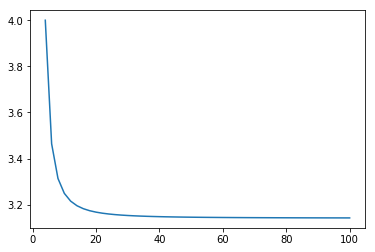

In [12]:
x_coords = list(range(4,101,2))  # Number of sides
y_coords = [polygon_circumference_diameter_ratio(x) for x in x_coords]
plt.plot(x_coords, y_coords)
plt.show()

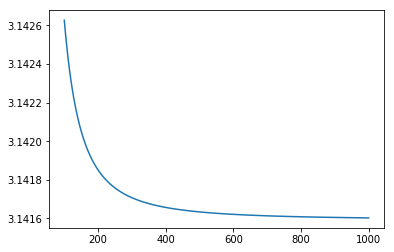

In [13]:
# So the number pi seems to be between 3.1 and 3.2 
# Let's look at the shapes with between 100 and 1000 sides
# May take a bit longer to run as it traces out the path
# of each of these shapes
x_coords = list(range(100,1001,2))  # Number of sides
y_coords = [polygon_circumference_diameter_ratio(x) for x in x_coords]
plt.plot(x_coords, y_coords)
plt.show()

So the number pi looks to be around 3.14...
Let's look at the difference between the calculated ratio of our 100,000 sided shape and the built in representation `math.pi`

In [14]:
polygon_circumference_diameter_ratio(100000)

3.141592654623319

In [15]:
math.pi

3.141592653589793

Pretty close!

So now you should have a good appreciation that

* Scaling an image doesn't alter its shape; it scales every part of the image equally.
* The ratio between any two lengths in a scaled image is the same as in the original image.
* The number pi is the ratio of the circumference to the diameter for *any* circle. It's just a number (near 3.14) and doesn't have any units.
* A circle is a regular polygon with infinite infinitly small sides!

Next we'll have a look at some more ratios; moving from the circle to the triangle.

